In [1]:
import numpy as np

data = np.genfromtxt('/home/darksst/Desktop/Fall24/StatisticalDecisionTheory/Data/gt_data/gt_2015.csv', skip_header=1, delimiter=',', usecols=(0, 3, 8, 9, 10))

data_clean = data[~np.isnan(data).any(axis=1)]

Y = data_clean[:, 3].reshape(-1, 1)  
X = data_clean[:, [0, 1]]

print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)


Shape of X: (7384, 2)
Shape of Y: (7384, 1)


In [2]:
input_size = X.shape[1]
hidden = 2
output = 1

bound = 1/np.sqrt(2)

#Weights and Biases for the hidden layer
W1 = np.random.uniform(low=-bound, high=bound, size=(input_size, hidden))
b1 = np.random.uniform(low=-bound, high=bound, size=(1, hidden))

#Weights and Biases for the output layer
W2 = np.random.uniform(low=-bound, high=bound, size=(hidden, output))
b2 = np.random.uniform(low=-bound, high=bound, size=(1, output))


In [3]:
def relu(Z):
    return np.maximum(0, Z)

def forward_propagation(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1  
    
    A1 = relu(Z1)  
    
    Z2 = np.dot(A1, W2) + b2 
    
    return Z2, A1 
    
Z2, A1 = forward_propagation(X, W1, b1, W2, b2)

In [4]:
def compute_loss(Y, Y_hat):
    m = Y.shape[0] 
    loss = (1/m) * np.sum((Y_hat - Y)**2) 
    return loss

Y_hat, _ = forward_propagation(X, W1, b1, W2, b2)

loss = compute_loss(Y, Y_hat)

print("Mean Squared Error (MSE) Loss:", loss)

Mean Squared Error (MSE) Loss: 66.78648862297081


In [5]:
def relu_derivative(Z):
    return Z > 0  

def backward_propagation(X, Y, W1, b1, W2, b2, A1, Y_hat):
    m = Y.shape[0]
    dZ2 = Y_hat - Y  
    dW2 = (1/m) * np.dot(A1.T, dZ2)  
    db2 = (1/m) * np.sum(dZ2, axis=0, keepdims=True)  

    dA1 = np.dot(dZ2, W2.T)  
    dZ1 = dA1 * relu_derivative(A1)  
    dW1 = (1/m) * np.dot(X.T, dZ1)
    db1 = (1/m) * np.sum(dZ1, axis=0, keepdims=True) 

    return dW1, db1, dW2, db2

Y_hat, A1 = forward_propagation(X, W1, b1, W2, b2)

dW1, db1, dW2, db2 = backward_propagation(X, Y, W1, b1, W2, b2, A1, Y_hat)

In [6]:
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2

    return W1, b1, W2, b2

alpha = 0.01 

W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

In [7]:
def train(X, Y, W1, b1, W2, b2, epochs, alpha):
    loss_history = [] 

    for epoch in range(epochs):
        # Step 1: Forward propagation
        Y_hat, A1 = forward_propagation(X, W1, b1, W2, b2)

        # Step 2: Compute the loss (MSE)
        loss = compute_loss(Y, Y_hat)
        loss_history.append(loss)

        # Step 3: Backward propagation
        dW1, db1, dW2, db2 = backward_propagation(X, Y, W1, b1, W2, b2, A1, Y_hat)

        # Step 4: Update the parameters
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

        # Print the loss every 50 epochs
        if epoch % 50 == 0:
            print(f'Epoch {epoch}/{epochs}, Loss: {loss}')

    return W1, b1, W2, b2, loss_history

Epoch 0/400, Loss: 14.706488549023492
Epoch 50/400, Loss: 5.748323201440285
Epoch 100/400, Loss: 5.030013933619313
Epoch 150/400, Loss: 4.878225286090602
Epoch 200/400, Loss: 4.824956690483424
Epoch 250/400, Loss: 4.79124286104354
Epoch 300/400, Loss: 4.772109031222311
Epoch 350/400, Loss: 4.831335614819339


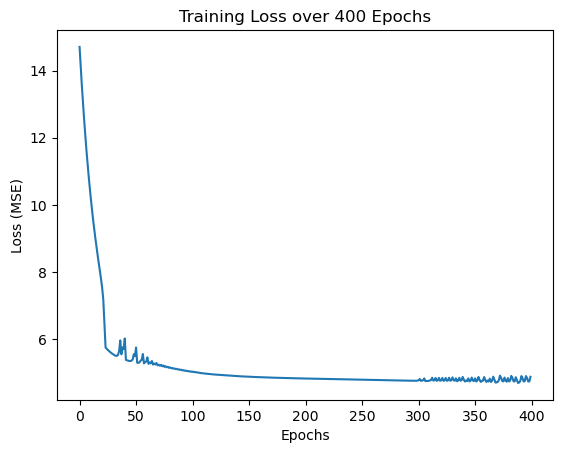

In [8]:
epochs = 400
alpha = 0.03

W1, b1, W2, b2, loss_history = train(X, Y, W1, b1, W2, b2, epochs, alpha)

# Plot the loss over epochs
import matplotlib.pyplot as plt

plt.plot(range(epochs), loss_history)
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training Loss over 400 Epochs')
plt.show()

Epoch 0/400, Loss: 13.05589485168457
Epoch 50/400, Loss: 5.020622253417969
Epoch 100/400, Loss: 4.999037265777588
Epoch 150/400, Loss: 4.996543884277344
Epoch 200/400, Loss: 4.995215892791748
Epoch 250/400, Loss: 4.994339942932129
Epoch 300/400, Loss: 4.993725776672363
Epoch 350/400, Loss: 4.993305206298828


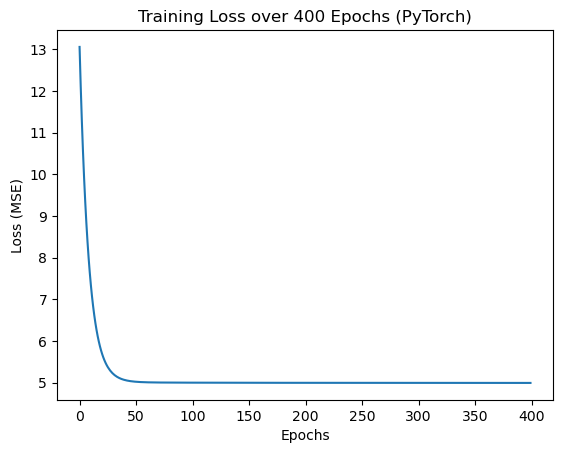

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Convert the NumPy arrays to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
Y_tensor = torch.tensor(Y, dtype=torch.float32)

class MLPModel(nn.Module):
    def __init__(self):
        super(MLPModel, self).__init__()
        self.hidden = nn.Linear(2, 2) 
        self.relu = nn.ReLU()  
        self.output = nn.Linear(2, 1)  

    def forward(self, x):
        x = self.hidden(x)  
        x = self.relu(x)     
        x = self.output(x)  
        return x
model = MLPModel()
criterion = nn.MSELoss()
learning_rate = 0.03
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

def train_model(model, X_tensor, Y_tensor, epochs, optimizer, criterion):
    loss_history = [] 

    for epoch in range(epochs):
        # Forward pass: Compute predicted Y by passing X to the model
        Y_pred = model(X_tensor)

        # Compute the loss
        loss = criterion(Y_pred, Y_tensor)

        # Backward pass: Compute gradients
        optimizer.zero_grad() 
        loss.backward()    

        # Update parameters
        optimizer.step()

        # Store the loss
        loss_history.append(loss.item())

        # Print loss every 50 epochs
        if epoch % 50 == 0:
            print(f'Epoch {epoch}/{epochs}, Loss: {loss.item()}')

    return loss_history

epochs_400 = 400
loss_history_400 = train_model(model, X_tensor, Y_tensor, epochs_400, optimizer, criterion)

plt.plot(range(epochs_400), loss_history_400)
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training Loss over 400 Epochs (PyTorch)')
plt.show()